In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import matplotlib.image as mping 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
import tensorflow as tf 

In [2]:
bank_data = pd.read_csv(r"C:\Users\zzsidhant\Downloads\bank.csv",sep=",") 
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Shape of Dataset
print(f"Data contains {bank_data.shape[0]} rows and {bank_data.shape[1]} columns")

Data contains 11162 rows and 17 columns


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Finding more about the dataset 
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
# Checking for missing values 
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Making dataset more readible 
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
bank_data.rename(columns={"deposit":"term_deposit"}, inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploratory Data Analysis 

#### Checking Target Variable

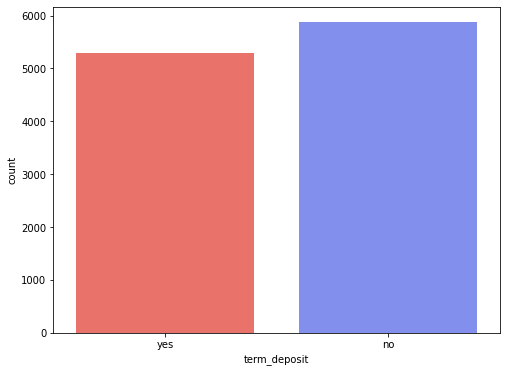

In [9]:
# creating a countplot to visualize the number of occurances of each class label
bank_data["term_deposit"].value_counts()
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax = sn.countplot(x = "term_deposit",data=bank_data,palette=["#fe5f55","#7181ff"]);

#### Checking Data Values residing with the attributes

In [10]:
# Writing a function for the same
def attribute_data(column_name):
    print(bank_data[column_name].value_counts())
    print()

In [11]:
attribute_data("job") # There are some variables which contain "unknown" data entries

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64



#### Creating visualiztions to gain more insights about the data

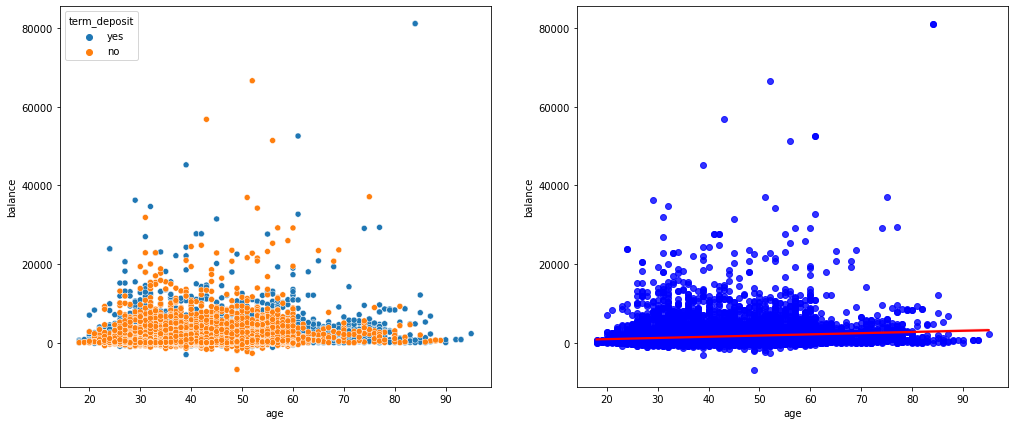

In [12]:
# Checking age vs balance. Does balance increase as the age increases? 
# What is the relationship between age and balance?
# Are they linearly or non-linearly related?
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(17,7))
ax0 = sn.scatterplot(data=bank_data, x="age", y="balance",hue="term_deposit",ax=ax0)
ax1 = sn.regplot(data=bank_data, x="age", y="balance",
                    scatter_kws={"color": "blue"}, line_kws={"color": "red"},fit_reg=True,ax=ax1)

In [13]:
# Checking age vs loan. Do aged individuals take more loans?
age_loan_group = bank_data.groupby(by = "loan")["age"].mean()
age_loan_group

loan
no     41.377139
yes    40.267123
Name: age, dtype: float64

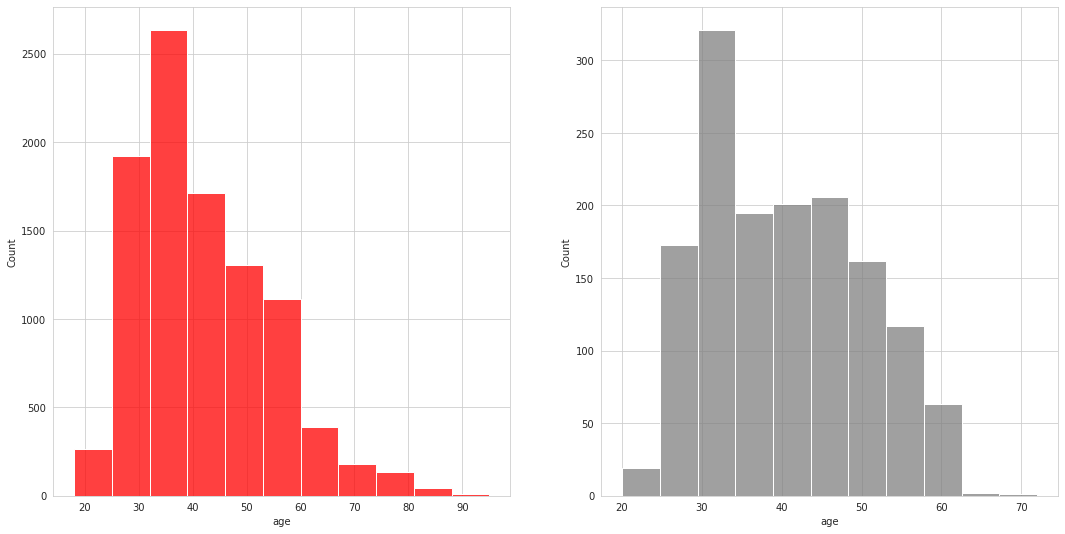

In [14]:
# Checking the distribution of age vs loans 
with sn.axes_style("whitegrid"):
    d1 = bank_data[bank_data["loan"]=="no"]
    d2 = bank_data[bank_data["loan"]=="yes"]
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(18,9))
    ax0 = sn.histplot(data=d1, x="age",ax = ax0, color="red",bins=11)
    ax1 = sn.histplot(data=d2, x="age", ax= ax1, color="grey", bins=11)

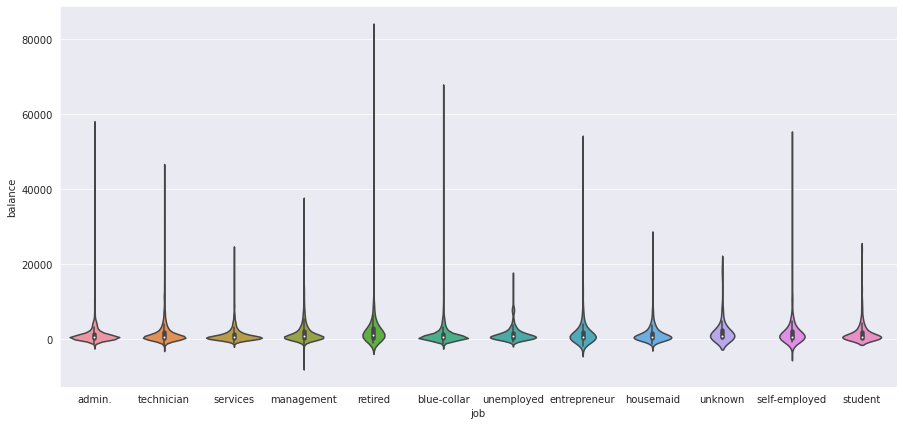

In [15]:
# Checking job vs balance
# Does the type of job influence the balance of an individual?
with sn.axes_style("darkgrid"):
    fig,ax = plt.subplots(1,1,figsize=(15,7))
    ax = sn.violinplot(x="job", y="balance", data=bank_data,ax = ax)

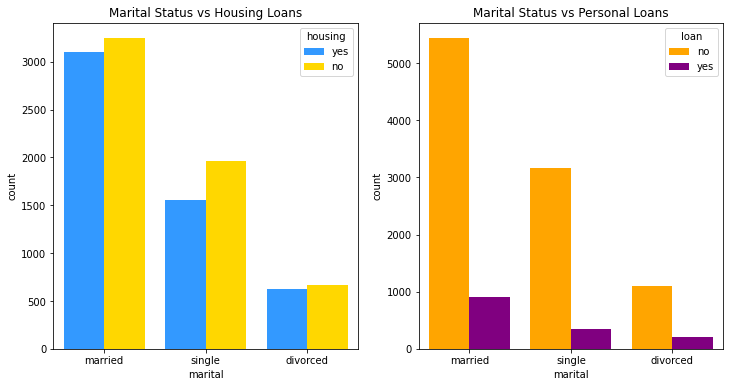

In [16]:
# Checking marital status vs housing loan and also marital status vs personal loan
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax0= sn.countplot(x = "marital" , hue = "housing",ax=ax0, 
                 data = bank_data, palette=["#3399ff","#ffd700"],saturation=1)
ax0.title.set_text('Marital Status vs Housing Loans')
ax1= sn.countplot(x = "marital" , hue = "loan",ax=ax1, 
                 data = bank_data, palette=["orange","purple"],saturation=1)
ax1.title.set_text('Marital Status vs Personal Loans')

In [17]:
marital_housing = pd.DataFrame(pd.crosstab(bank_data["marital"],bank_data["housing"]))
marital_housing["%require house loans"]= ((marital_housing["yes"]/(marital_housing["no"]+marital_housing["yes"]))*100)
print(marital_housing)
marital_loan = pd.DataFrame(pd.crosstab(bank_data["marital"],bank_data["loan"]))
marital_loan["%require personal loans"] = ((marital_loan["yes"]/(marital_loan["no"]+marital_loan["yes"]))*100)
print()
print(marital_loan)

housing     no   yes  %require house loans
marital                                   
divorced   668   625             48.337200
married   3246  3105             48.889939
single    1967  1551             44.087550

loan        no  yes  %require personal loans
marital                                     
divorced  1092  201                15.545244
married   5438  913                14.375689
single    3172  346                 9.835134


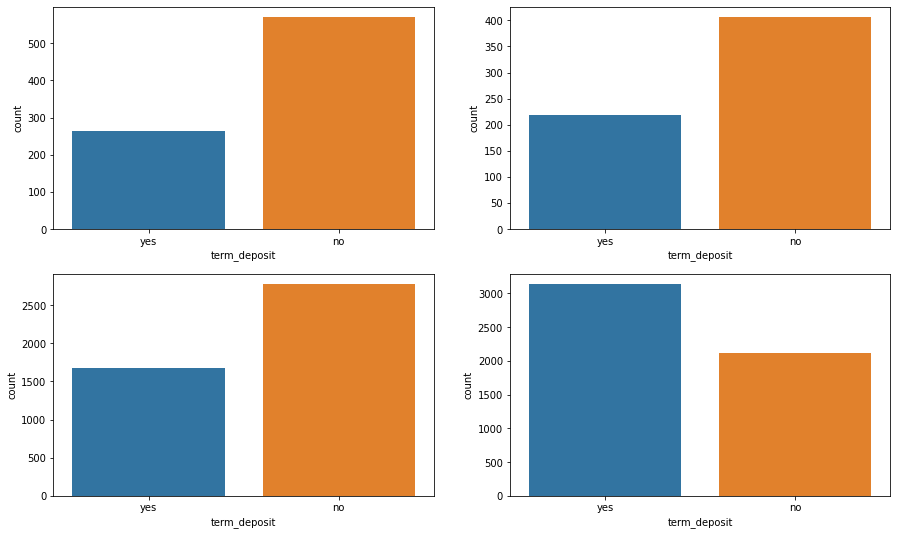

In [18]:
# How is the behaviour of an individual who has availed for both housing and a personal loans, different from someone 
# who hasnt availed either of the loans, does it impact the likelihood of subscribing the term deposit?

set_1 = bank_data[(bank_data["housing"]=="yes") & (bank_data["loan"]=="yes")].reset_index()
set_2 = bank_data[(bank_data["housing"]=="no") & (bank_data["loan"]=="yes")].reset_index()
set_3 = bank_data[(bank_data["housing"]=="yes") & (bank_data["loan"]=="no")].reset_index()
set_4 = bank_data[(bank_data["housing"]=="no") & (bank_data["loan"]=="no")].reset_index()

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2,figsize=(15,9))
ax0 = sn.countplot(x = "term_deposit",data=set_1,ax=ax0)
ax1 = sn.countplot(x = "term_deposit",data=set_2,ax=ax1)
ax2 = sn.countplot(x = "term_deposit",data=set_3,ax=ax2)
ax3 = sn.countplot(x = "term_deposit",data=set_4,ax=ax3)

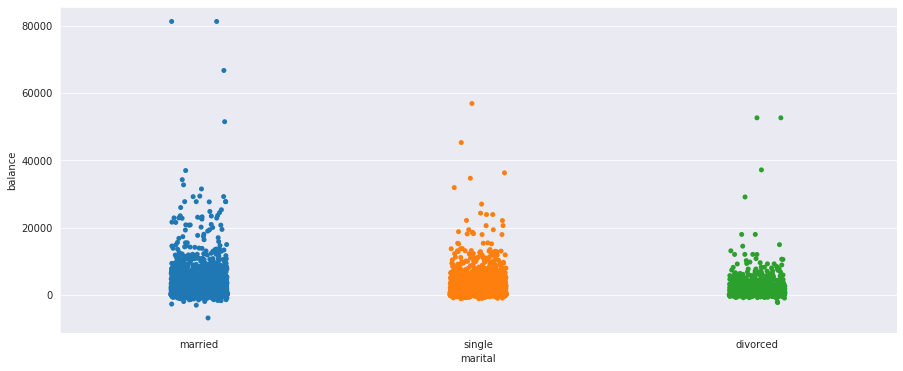

In [19]:
# Checking marital status vs balance and also pdays vs balance 
with sn.axes_style("darkgrid"):
    fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
    ax0 = sn.stripplot(x="marital",y="balance",data=bank_data,ax=ax0);

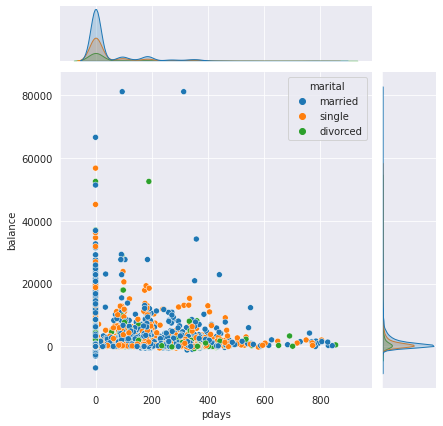

In [20]:
with sn.axes_style("darkgrid"):
    sn.jointplot(x="pdays",y="balance",hue="marital",data=bank_data);

In [21]:
# Checking which months witnessed the highest activity
month_term_groupby = bank_data.groupby(by="month")["term_deposit"].count()
month_term_groupby.sort_values()

month
dec     110
mar     276
sep     319
jan     344
oct     392
feb     776
apr     923
nov     943
jun    1222
jul    1514
aug    1519
may    2824
Name: term_deposit, dtype: int64

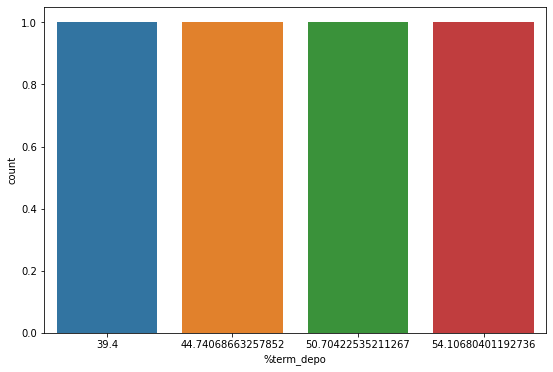

In [22]:
ed_dep = pd.DataFrame(pd.crosstab(bank_data["education"],bank_data["term_deposit"]))
ed_dep["%term_depo"] = (ed_dep["yes"]/ (ed_dep["yes"]+ ed_dep["no"]))*100
fig,ax=plt.subplots(1,1,figsize=(9,6))
ax = sn.countplot(x=ed_dep["%term_depo"]);

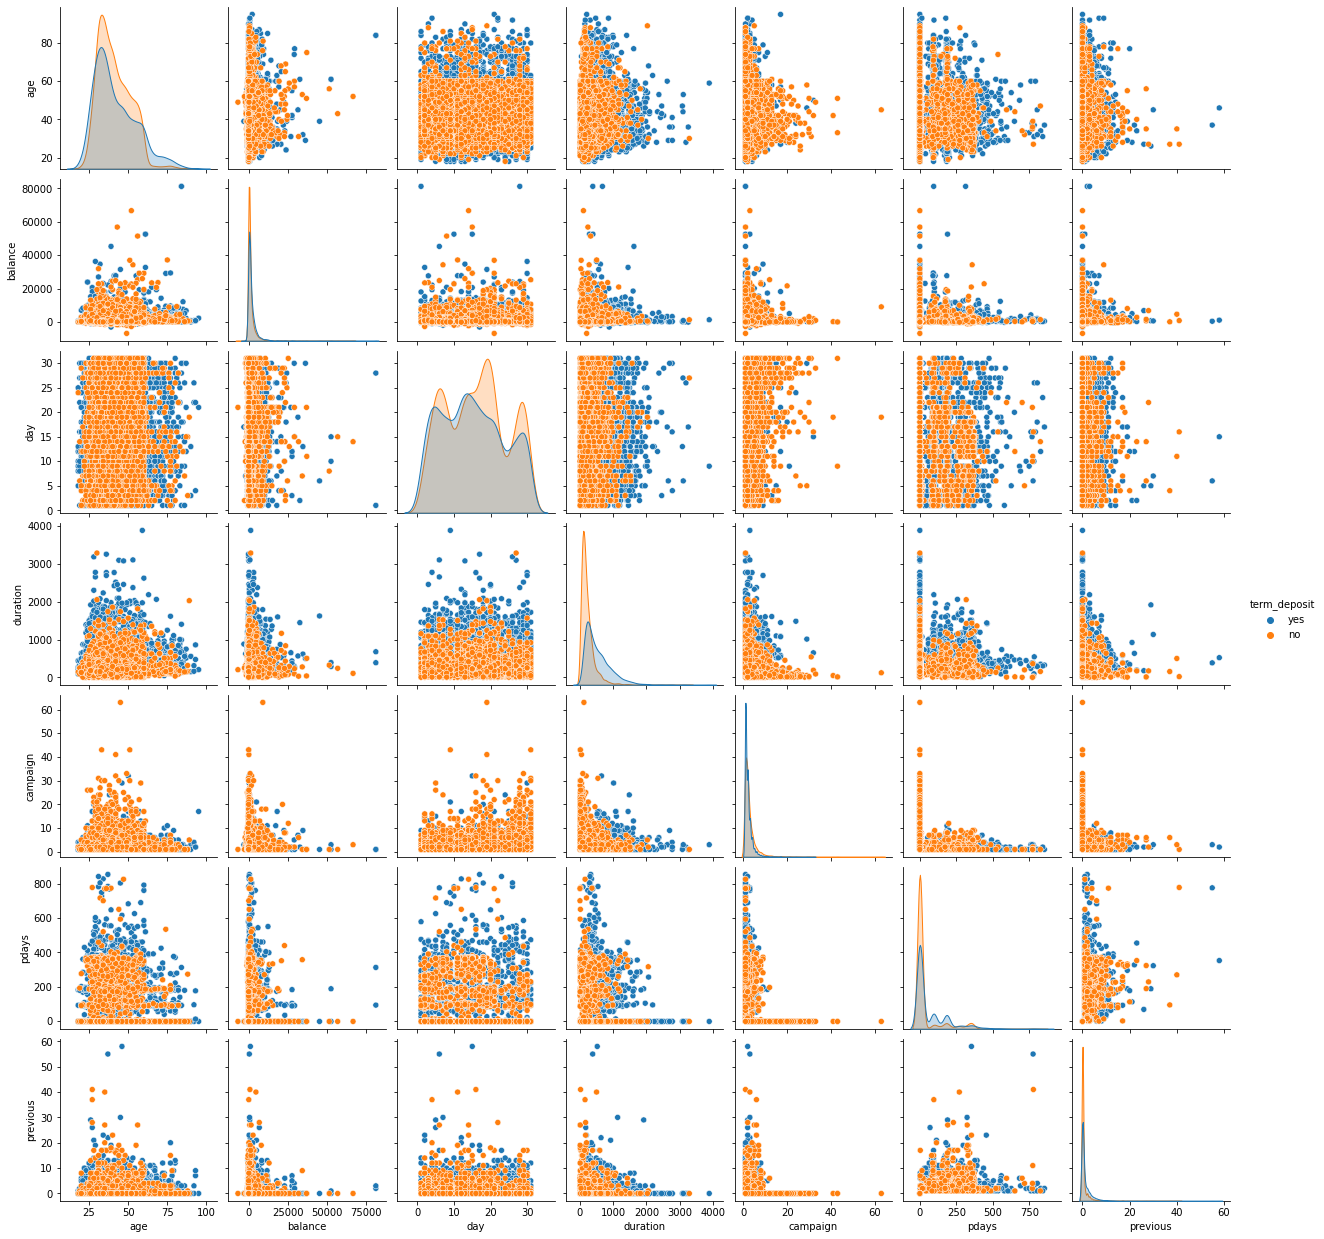

In [23]:
sn.pairplot(bank_data,hue="term_deposit");

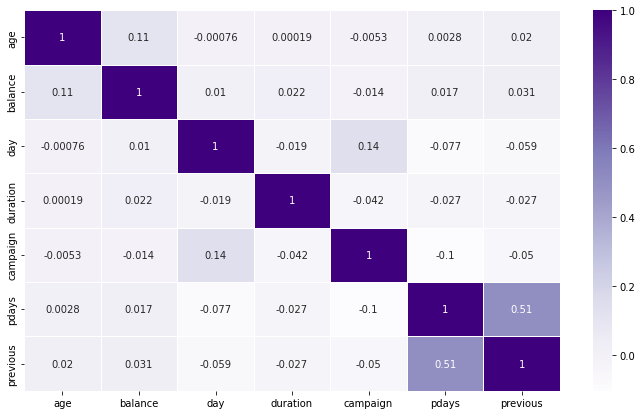

In [24]:
# checking correlation of numerical attributes
fig,ax=plt.subplots(1,1,figsize=(12,7))
correlation_matrix = bank_data.corr()
sn.heatmap(correlation_matrix,annot=True,cbar=True,cmap="Purples",linewidth=0.5,ax=ax);

## Data Preprocessing

In [25]:
# There seem to be "unknown" data entries within some attributes, which was seen in the previous section.
# Writing a function to fetch the column names with "unknown" values

def unknown_var(df):
    """
    The function will input the dataframe and split it into categorical and numeric features. 
    Once the splitting is completed, the categorical features will be iterated upon to categorize those attributes whose values
    contains traces of "unknown" entries. 
    The function returns a list of variables having these values
    """
    list_var_having_unknowns = []
    object_columns = []
    
    # obtaining the column names for the "object" datatype columns
    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            object_columns.append(column)
            
    # # Iterating through the categorical features 
    for col in object_columns:
        for i in range(0,len(df[col].unique())):
            if list(df[col].value_counts().items())[i][0] == "unknown":
                list_var_having_unknowns.append(col)
    
    return list_var_having_unknowns

list_var = unknown_var(bank_data)
list_var

['job', 'education', 'contact', 'poutcome']

In [26]:
# Replacing the "unknown" entries with np.nan values
missing_bank = bank_data.replace({"unknown":np.nan})

### Missing Values Treatment

In [27]:
# "job" attribute contains only 0.64% of missing data. Using SimpleImputer class from sklearn, we can replace the missing
# values with the mode of the attribute

# Instanciate the SimpleImputer class
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the estimator
imp_mode.fit(missing_bank[["job"]])

# Transform the attribute
missing_bank["job"] = imp_mode.transform(missing_bank[["job"]])

print("Missing Values for job attribute treated!")

Missing Values for job attribute treated!


In [28]:
# Carrying out the same process for "education" attribute 

# Instanciate the SimpleImputer class
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the estimator
imp_mode.fit(missing_bank[["education"]])

# Transform the attribute and reassign to the parent attribute
missing_bank["education"] = imp_mode.transform(missing_bank[["education"]])

print("Missing Values for education attribute treated!")

Missing Values for education attribute treated!


In [29]:
# "poutcome" contains 81.74% of missing data, dropping this feature
missing_bank.drop("poutcome",axis=1,inplace= True)
missing_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,term_deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,yes


### Creating a ML model to predict the missing values in the "contact" attribute

In [49]:
# Separate feature matrix and target variable 
missing_bank_without_target = missing_bank.drop("term_deposit",axis=1)

# Seperate the null values from the dataset and label the remaining data as train data. This data will be used to train an
# estimator 
train_data_missing = missing_bank_without_target.dropna().reset_index()
train_data_missing.drop("index",inplace=True, axis=1)

# The data containing null values will be used as the test set. The missing values will be predicted for and replaced
# in this dataset
test_data_missing = missing_bank_without_target[missing_bank_without_target.isnull().any(axis=1)].reset_index()
test_data_missing.drop("index",inplace=True, axis=1)

###### Feature Encoding

In [31]:
# Splitting data into independant and dependant variables 
X = train_data_missing.drop("contact",axis=1)
y = train_data_missing["contact"]

# Creating train and test sets 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((7052, 14), (1764, 14), (7052,), (1764,))

In [72]:
# Replacing "cellular" and "telephone" with 0 and 1  in y_train
y_train = y_train.replace(to_replace=["cellular" , "telephone"], value = [0,1])

# splitting data into categorical or "cat_var" for feature encoding
cat_var = X_train.select_dtypes(include="object")

# BackwardDifference Encoding
encoder = ce.BackwardDifferenceEncoder()
cat_encoded_data = encoder.fit_transform(cat_var)
cat_encoded_data.drop("intercept",axis=1,inplace=True)
cat_encoded_data.reset_index(inplace=True)

# splitting into numerical or "num_var" for standardization and feature selection
num_var = X_train.select_dtypes(include="int64")

# The numerical attributes consists of outliers, therefore, using standardization or normalization would prove to be inaccurate 
# Choosing robust standardization technique is a better approach for accomodating th outliers in the features. 
# The scaling is performed using the median value

robust_scaler = RobustScaler()
num_cols = num_var.columns
scaled_num_var = pd.DataFrame(robust_scaler.fit_transform(num_var),columns=num_cols)
scaled_num_var.reset_index(inplace=True)

In [73]:
# concatenating the categorical and numrical dataset and proceeding to feature selection phase
encoded_bank_data = pd.concat([cat_encoded_data,scaled_num_var],axis=1)
encoded_bank_data.drop("index",axis=1,inplace=True)
encoded_bank_data.head()

,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_8,month_9,month_10,age,balance,day,duration,campaign,pdays,previous
0,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,...,-0.25,-0.166667,-0.083333,0.055556,-0.349859,0.428571,2.331429,1.0,0.0,0.0
1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,...,-0.25,-0.166667,-0.083333,0.277778,-0.171803,0.357143,-0.222857,-0.5,0.0,0.0
2,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,...,-0.25,-0.166667,-0.083333,-0.500000,-0.265893,1.000000,-0.280000,0.0,0.0,0.0
3,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,...,-0.25,-0.166667,-0.083333,-0.166667,-0.337353,0.357143,-0.654286,-0.5,0.0,0.0
4,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,...,-0.25,-0.166667,-0.083333,-0.722222,-0.093792,-0.714286,0.531429,0.0,0.0,0.0


#### Feature Extraction 

Optimal Number of components are:  24


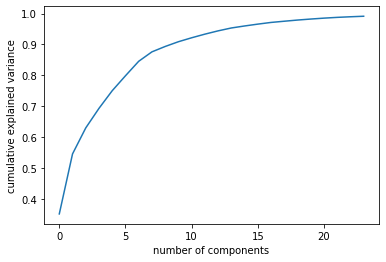

In [86]:
# PCA
# choosing the right number of principal components
pca = PCA(0.99)
pca.fit(encoded_bank_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print("Optimal Number of components are: ",pca.n_components_)

In [36]:
# Applying PCA on stand_data
pca_df = pd.DataFrame(PCA(0.99).fit_transform(encoded_bank_data))
pca_df.reset_index(drop=True,inplace=True)

##### Feature Selecion (RFECV)

In [37]:
# Performing Recursive Feature Elimination using Cross-Validation (RFECV)

# Identifying the features of RFE-CV with RF
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(pca_df, y_train)
rfecv.fit(pca_df, y_train)

C:\Users\zzsidhant\Desktop\bank_data_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


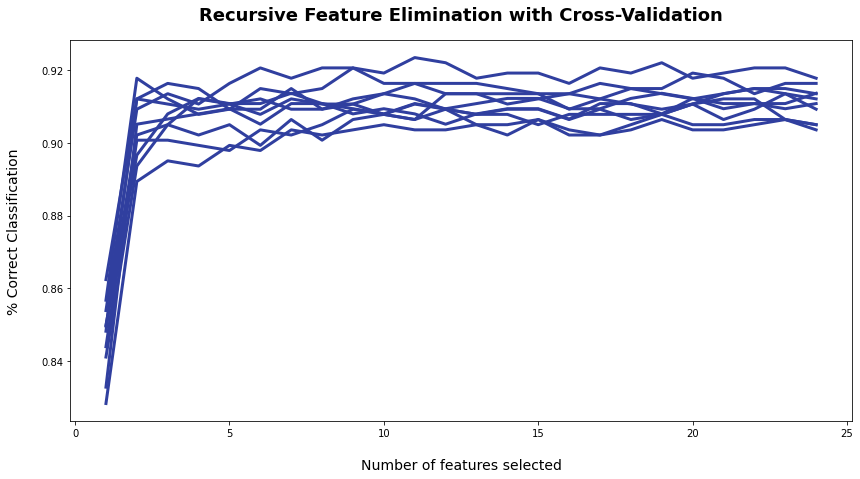

In [38]:
# Plotting the accuracy obtained with every features used:
plt.figure(figsize=(14, 7))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [39]:
rfecv.score(pca_df,y_train)

0.9998581962563812

In [217]:
# final x_train and y_ train sets 
final_X_train = pca_df
# y_train

## Preparing the test sets

In [223]:
# replace "cellular" and "telephone" in y_train 
y_test = y_test.replace(to_replace=["cellular" , "telephone"], value = [0,1])

In [224]:
# splitting data into categorical or "cat_var" for feature encoding
cat_var = X_test.select_dtypes(include="object")

# encoding the categorical features 
test_encoded_cat_var = encoder.transform(cat_var)
test_encoded_cat_var.drop("intercept",axis=1,inplace=True)

# standardising numerical features 
num_var_test = X_test.select_dtypes(include="int64")
pd.DataFrame(robust_scaler.transform(num_var_test),columns=num_cols)

# concatenate to form complete test set
encoded_bank_test_data = pd.concat([test_encoded_cat_var,num_var_test],axis=1)
encoded_bank_test_data.head()

# transform with PCA 
final_X_test = pd.DataFrame(pca.transform(encoded_bank_test_data))

# Treating Test Set Separately

In [207]:
# replace "cellular" and "telephone" in y_train 
y_test = y_test.replace(to_replace=["cellular" , "telephone"], value = [0,1])

# splitting data into categorical or "cat_var" for feature encoding
test_cat_var = X_test.select_dtypes(include="object")

# BackwardDifference Encoding
encoder = ce.BackwardDifferenceEncoder()
test_cat_encoded_data = encoder.fit_transform(test_cat_var)
test_cat_encoded_data.drop("intercept",axis=1,inplace=True)
test_cat_encoded_data.reset_index(inplace=True)

# splitting into numerical or "test_num_var" for standardization and feature selection
test_num_var = X_test.select_dtypes(include="int64")

# The numerical attributes consists of outliers, therefore, using standardization or normalization would prove to be inaccurate 
# Choosing robust standardization technique is a better approach for accomodating th outliers in the features. 
# The scaling is performed using the median value

robust_scaler = RobustScaler()
num_cols = test_num_var.columns
scaled_num_var = pd.DataFrame(robust_scaler.fit_transform(test_num_var),columns=num_cols)
scaled_num_var.reset_index(inplace=True)
scaled_num_var = scaled_num_var.drop("index",axis=1)

# concatenate to form complete test set
encoded_bank_test_data = pd.concat([test_cat_encoded_data , scaled_num_var],axis=1)
encoded_bank_test_data.drop("index",axis=1,inplace=True)

# pca 
pca_df = pd.DataFrame(PCA(0.99).fit_transform(encoded_bank_test_data))
pca_df.reset_index(drop=True,inplace=True)
final_X_test = pca_df

In [209]:
final_X_test.shape

(1764, 24)

In [210]:
y_test.shape

(1764,)

In [214]:
# Performing SMOTE on the final_X_test and y_test

In [222]:
sum(y_train ==1) / sum(y_train ==0)

0.09895589839488858

### Data Modelling

In [106]:
# Final x_test , y_test :  final_X_test , y_test
# Final x_train , y_train :  final_X_train , y_train 

In [225]:
# Creating a function to fit the ML algorithm 
def fit_algorithm(estimator, X_train = final_X_train , y_train = y_train , X_test = final_X_test , y_test = y_test):
    """
    This function will be used for fitting the machine learning model on the training dataset.
    The function will also call the `evaluate_fit` function within itself, so as to evaluate the fit of the model.
    
    Args:
        estimator: An instance of the ML algorithm to be fitted on the training data 
        X_train : Training dataset 
        y_train : Target training dataset 
    """
    # Fit the model 
    estimator.fit(X_train,y_train)
    print("The Training Score is : ",estimator.score(X_train,y_train))
    print("The Testing Score is : ",estimator.score(X_test,y_test))
    
    # Calling the evaluate function
    return evaluate_fit(estimator,X_train,y_train) 
    
    
def evaluate_fit(estimator, X_train = final_X_train , y_train = y_train , X_test = final_X_test , y_test = y_test):
    """
    This function evaluates the fit of the model. The function predicts for X_test and evalautes the prediction against the
    true values.
    """
    y_preds = estimator.predict(X_test)
    # Evaluation Metrics
    accuracy = round(accuracy_score(y_test,y_preds),3)
    precision = round(precision_score(y_test,y_preds),3)
    recall = round(recall_score(y_test,y_preds),3)
    f1 = round(f1_score(y_test,y_preds),3)
    print("Accuracy Score: ",accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("f1: ",f1)
    
    # Confusion Matrix
    print(classification_report(y_test,y_preds))
    estimate_cm = confusion_matrix(y_test,y_preds)
    fig,ax = plt.subplots(1,1,figsize=(6,5))
    sn.heatmap(estimate_cm,annot=True,cmap="Purples",ax=ax,linewidth=0.8,cbar=True);
    plt.xlabel("Predicted");
    plt.ylabel("Truth");
    
    # Returning the results in the form of a dataframe for performance comparision
    metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
    }
    return metrics

In [226]:
fit_algorithm(KNeighborsClassifier(),final_X_train,y_train,final_X_test,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1764, 7052]

The Training Score is :  0.9259784458309699
The Testing Score is :  0.8764172335600907
Accuracy Score:  0.876
Precision:  0.184
Recall:  0.165
f1:  0.174
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1625
           1       0.18      0.17      0.17       139

    accuracy                           0.88      1764
   macro avg       0.56      0.55      0.55      1764
weighted avg       0.87      0.88      0.87      1764



{'accuracy': 0.876, 'precision': 0.184, 'recall': 0.165, 'f1': 0.174}

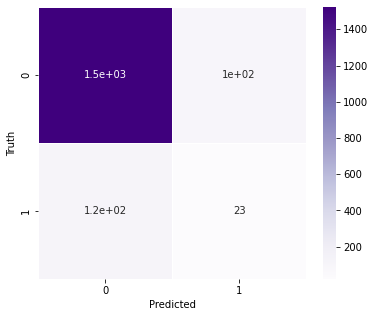

In [213]:
fit_algorithm(GradientBoostingClassifier(),final_X_train,y_train,final_X_test,y_test)

#### Check for normality in Data

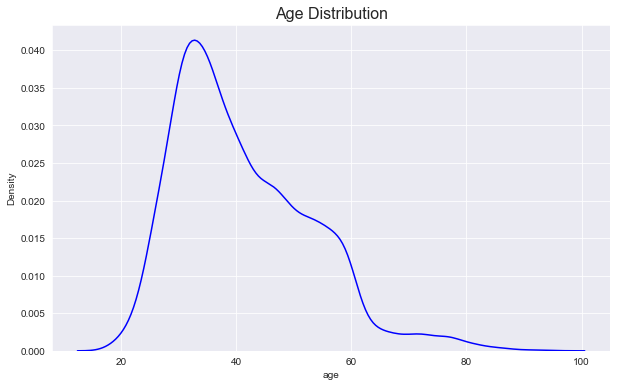

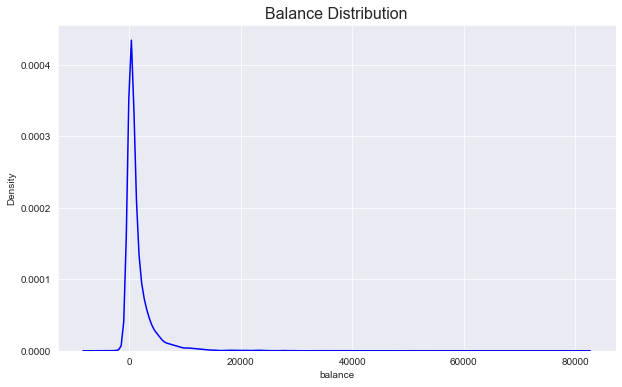

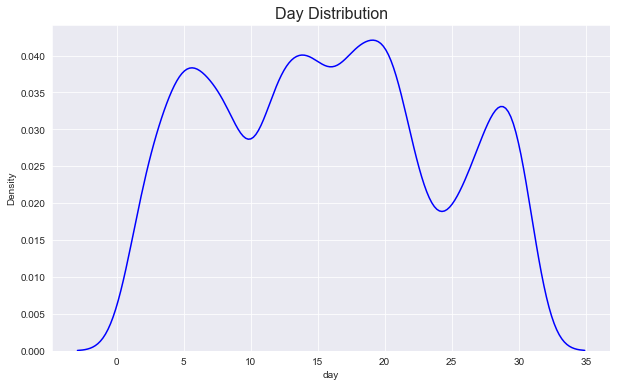

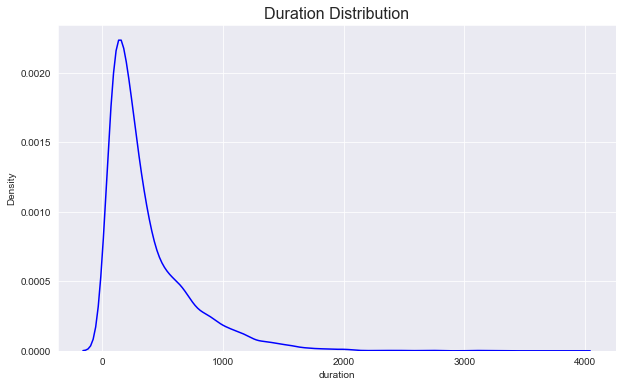

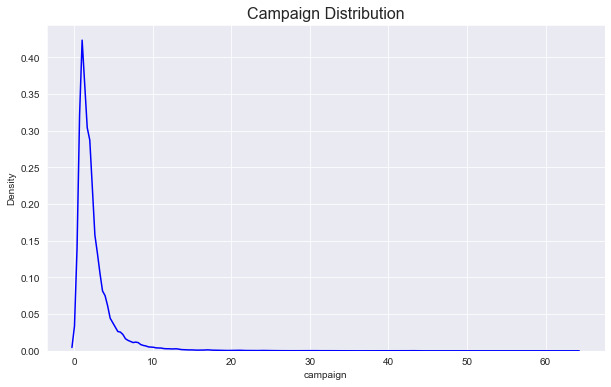

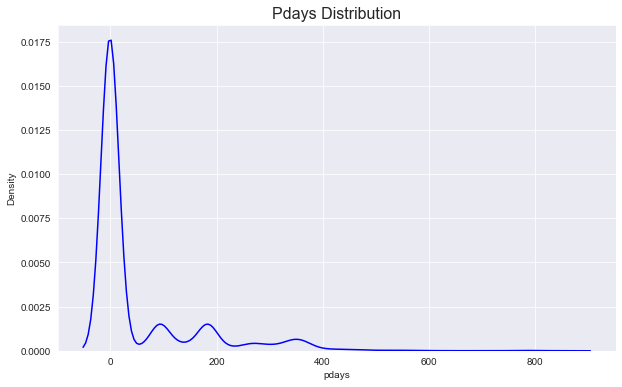

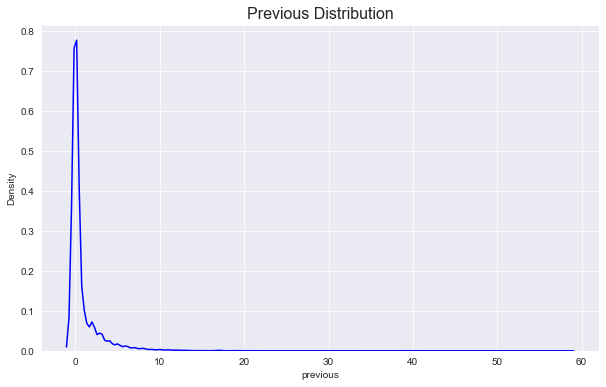

In [42]:
def plot_histogram(df):
    """
    This function will be used to check normality in the numerical attributes of the data. It will be useful in providing 
    insight about the skew and kurtosis of the data, which will be monumental in deciding the data transformation
    approach
    The function input the dataframe and will generate a historgram using kdeplot() function of the seaborn library
    """
    # obtaining the column names for the "numeric" datatype columns
    for column in df.columns:
        if df[column].dtypes!="O":
            with sn.axes_style("darkgrid"):
                fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
                plt.title(f"{column.capitalize()} Distribution",fontsize=16);
                sn.kdeplot(bank_data[column],color="blue",ax=ax);
                plt.show()
plot_histogram(bank_data)

#### Outlier Detection 

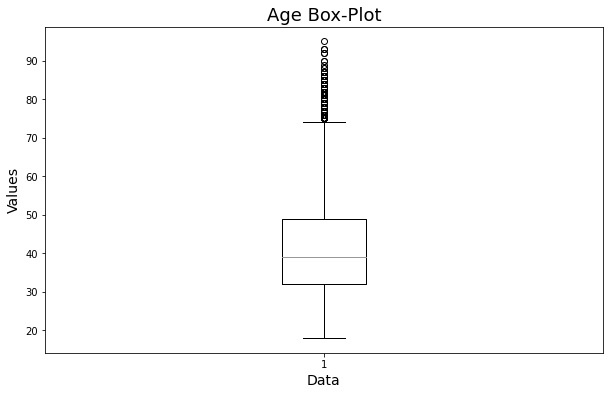

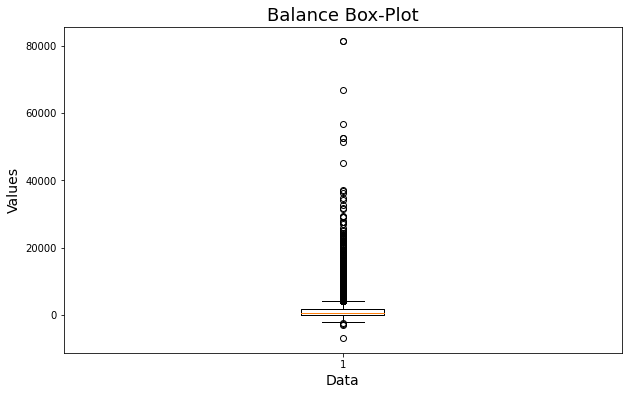

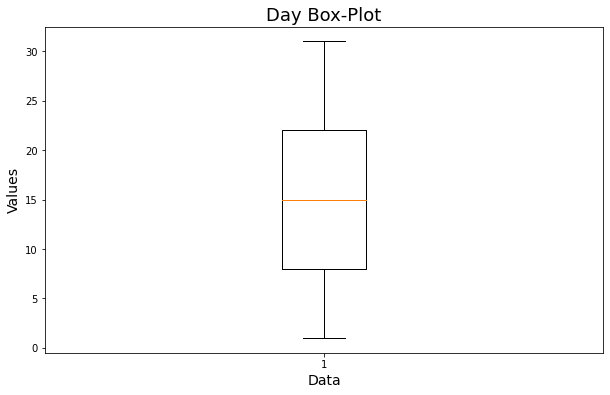

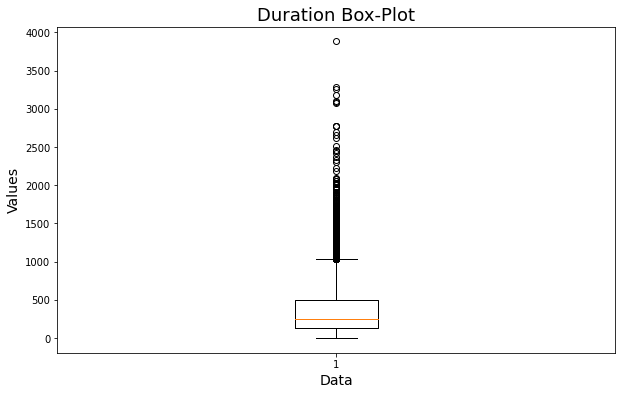

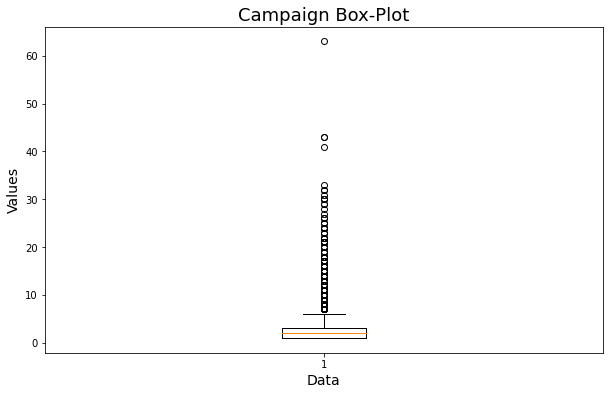

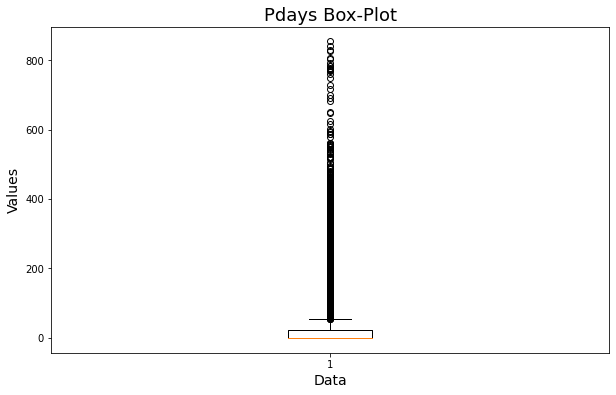

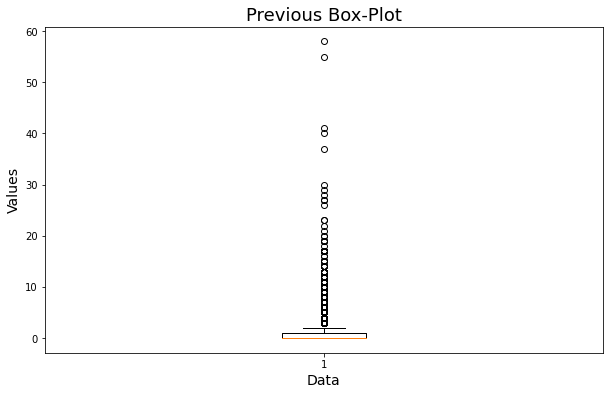

In [43]:
# creating a function for finding outliers 

def visualize_outliers(df):
    """
    This function will project the outliers in the numerical attributes on a box-whisker plot
    """
    
    for column in df.columns:
        if df[column].dtypes!="O":
            plt.subplots(nrows=1,ncols=1,figsize=(10,6))
            plt.boxplot(df[column])
            plt.title(f"{column.capitalize()} Box-Plot",fontsize=18)
            plt.xlabel("Data" , fontsize=14)
            plt.ylabel("Values", fontsize=14)

visualize_outliers(bank_data)

Notes:

1. Dataset contains a class imbalance 
2. There are mentions of "unknown" values in the categorical values 
3. Presence of outliers in the numerical data 
4. Data is not normally distributed
5. Overlap in pairplots, linear ML alorithms will not work


https://datascience.stackexchange.com/questions/15630/train-test-split-after-performing-smote#:~:text=4%20Answers&text=is%20not%20useful-,Show%20activity%20on%20this%20post.,only%20original%20samples)%20to%20evaluate.

https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis https://archive.ics.uci.edu/ml/datasets/bank+marketing

https://python.plainenglish.io/predict-missing-dataframe-values-with-an-ml-algorithm-717cd872f1a8